In [50]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [17]:
file_dir = "733_Final_Project/data/raw_mobibikes_data/Mobi_System_Data_2020/"  # file directory
all_csv_list = os.listdir(file_dir)
for single_csv in all_csv_list:
    single_data_frame = pd.read_csv(os.path.join(file_dir, single_csv))
    if single_csv == all_csv_list[0]:
        bike_data = single_data_frame
    else:  # concatenate all csv to a single dataframe, ingore index
        bike_data = pd.concat([bike_data, single_data_frame], ignore_index=True)

In [18]:
bike_data.head()

,Departure,Return,Bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure battery voltage (mV),Return battery voltage (mV),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of bike stopovers,Number of stopovers
0,2020-04-01 0:00,2020-04-01 0:00,1654.0,0088 Harwood & Bute,0207 Alberni & Jervis,365 Day Pass Plus SALE,1176.0,294,3831,3964,8,10,0,0.0,NaN
1,2020-03-31 23:00,2020-04-01 0:00,988.0,0009 Spyglass & Seawall,0173 1st & Columbia,365 Corporate Standard,588.0,187,3919,4001,7,8,0,0.0,NaN
2,2020-03-31 23:00,2020-03-31 23:00,1925.0,0011 Ontario & Seawall,0010 Stamp's Landing,365 Corporate Standard,1366.0,355,3856,4032,6,6,0,0.0,NaN
3,2020-03-31 23:00,2020-03-31 23:00,1537.0,0159 Vine & 4th,0187 Bute & Davie,365 Day Pass Standard SALE,3299.0,1064,3934,4079,7,8,0,0.0,NaN
4,2020-03-31 22:00,2020-03-31 22:00,1991.0,0070 10th & Granville,0068 Cypress & Broadway,365 Plus,782.0,256,3848,4000,7,6,0,0.0,NaN


In [19]:
all_data_frame.shape

(572166, 15)

In [20]:
gps_data = pd.read_pickle('733_Final_Project/data/geocodings.pickle')

In [23]:
len(gps_data)

133

In [24]:
all_data_frame.nunique()

Departure                          8435
Return                             8440
Bike                               2054
Departure station                   225
Return station                      225
Membership type                      22
Covered distance (m)              10052
Duration (sec.)                   13293
Departure battery voltage (mV)      778
Return battery voltage (mV)         799
Departure temperature (C)            57
Return temperature (C)               57
Stopover duration (sec.)           3667
Number of bike stopovers             13
Number of stopovers                  14
dtype: int64

In [151]:
data_2017 = pd.read_csv('733_Final_Project/tmp_2017_geocoded.csv',  compression='zip', index_col=0)
data_2017.shape

(573706, 20)

In [152]:
data_2017.nunique()

Departure                          8476
Return                             8474
Bike                               1371
Departure station                   132
Return station                      133
Membership type                      15
Covered distance (m)              10080
Duration (sec.)                   12900
Departure battery voltage (mV)      680
Return battery voltage (mV)         729
Departure temperature (°C)           52
Return temperature (°C)              50
Stopover duration (sec.)           4014
Number of stopovers                  14
Departure postal code               117
Departure lat                       131
Departure long                      131
Return postal code                  118
Return lat                          132
Return long                         132
dtype: int64

In [47]:
data_2017.isnull().sum()

Departure                           0
Return                              3
Bike                               65
Departure station                   1
Return station                     18
Membership type                    89
Covered distance (m)                0
Duration (sec.)                     0
Departure battery voltage (mV)      0
Return battery voltage (mV)         0
Departure temperature (°C)          0
Return temperature (°C)             0
Stopover duration (sec.)            0
Number of stopovers                 0
Departure postal code             279
Departure lat                     279
Departure long                    279
Return postal code                345
Return lat                        345
Return long                       345
dtype: int64

In [153]:
# drop Na
data_2017 = data_2017.dropna()
data_2017.shape

(573059, 20)

In [154]:
data_2017['Return long'].value_counts()

-123.104207    14984
-123.136972    14893
-123.137820    14496
-123.142139    13550
-123.150433    13524
               ...  
-123.126006       68
-79.491336        43
-123.098794       30
-123.145782       16
-123.124670        1
Name: Return long, Length: 132, dtype: int64

In [155]:
v6 = data_2017[data_2017['Return postal code'].str.startswith('V6')]
v6 = v6[v6['Departure postal code'].str.startswith('V6')]
v6.shape

(413872, 20)

In [156]:
v6.nunique()

Departure                          8318
Return                             8306
Bike                               1365
Departure station                   100
Return station                      101
Membership type                      15
Covered distance (m)               9703
Duration (sec.)                   11766
Departure battery voltage (mV)      660
Return battery voltage (mV)         707
Departure temperature (°C)           52
Return temperature (°C)              49
Stopover duration (sec.)           3450
Number of stopovers                  14
Departure postal code                87
Departure lat                       100
Departure long                      100
Return postal code                   88
Return lat                          101
Return long                         101
dtype: int64

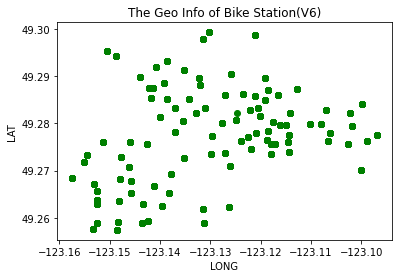

In [157]:
plt.scatter(v6['Return long'], v6['Return lat'], c='g')
plt.scatter(v6['Departure long'], v6['Departure lat'], c='g',)
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title('The Geo Info of Bike Station(V6)')
plt.show()

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [158]:
v6['features'] = v6['Return long'].apply(lambda x : [x]) + v6['Return lat'].apply(lambda x : [x])
v6.shape

(413872, 21)

In [159]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(list(v6.features))

In [160]:
X = list(v6['features'])
kmeans = KMeans(n_clusters=3).fit(scaled_features)

In [161]:
df_kmeans_v6 = v6.copy()
df_kmeans_v6['label'] = kmeans.labels_

In [162]:
df_kmeans_v6['label'].value_counts()

1    186864
0    157514
2     69494
Name: label, dtype: int64

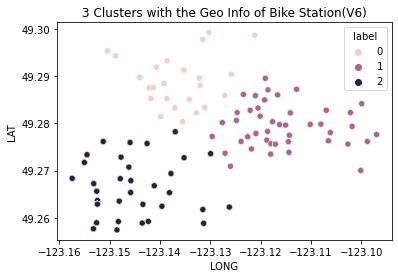

In [163]:
sns.scatterplot(x='Return long', y='Return lat', hue='label', data=df_kmeans_v6)
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title('3 Clusters with the Geo Info of Bike Station(V6)')
plt.show()

In [164]:
X = list(v6['features'])
kmeans = KMeans(n_clusters=5).fit(scaled_features)
df_kmeans_v6 = v6.copy()
df_kmeans_v6['label'] = kmeans.labels_
df_kmeans_v6['label'].value_counts()

1    106209
4     94016
0     91560
3     69408
2     52679
Name: label, dtype: int64

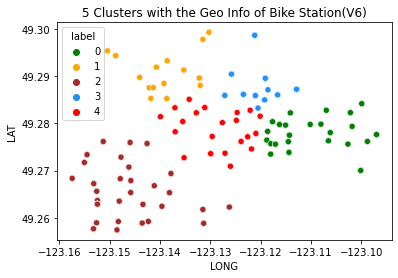

In [165]:
sns.scatterplot(x='Return long', y='Return lat', hue='label', data=df_kmeans_v6, palette=['green','orange','brown','dodgerblue','red'])
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title('5 Clusters with the Geo Info of Bike Station(V6)')
plt.show()

In [166]:
X = list(v6['features'])
kmeans = KMeans(n_clusters=8).fit(scaled_features)
df_kmeans_v6 = v6.copy()
df_kmeans_v6['label'] = kmeans.labels_
df_kmeans_v6['label'].value_counts()

4    77825
7    71025
1    65877
6    51441
3    50051
0    48638
2    25836
5    23179
Name: label, dtype: int64

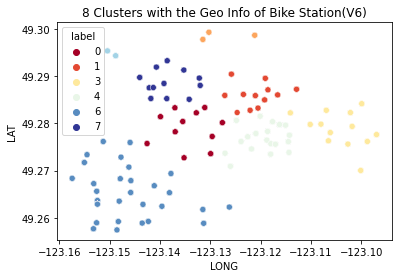

In [167]:
sns.scatterplot(x='Return long', y='Return lat', hue='label', data=df_kmeans_v6, 
                palette='RdYlBu')
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title('8 Clusters with the Geo Info of Bike Station(V6)')
plt.show()